In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf



In [22]:
Directory = "Desktop/train/"

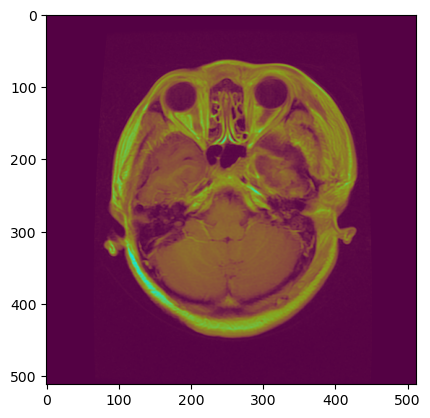

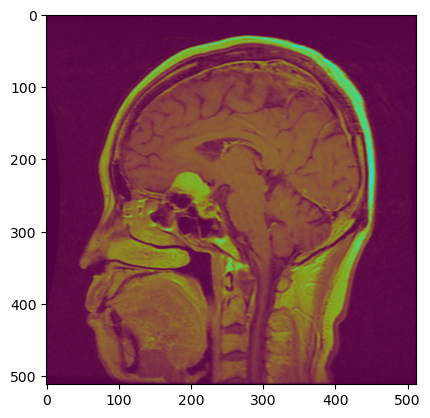

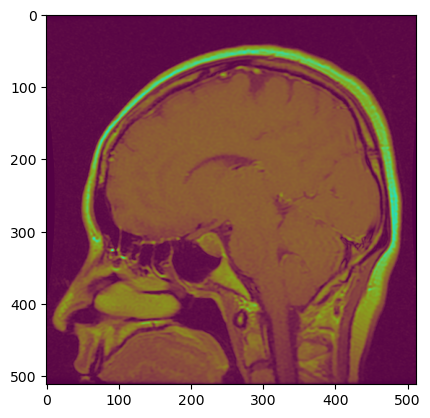

In [23]:
categories = ["Glioma","Meningioma","Pituitary tumor"]


for category in categories:
    path = os.path.join(Directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break

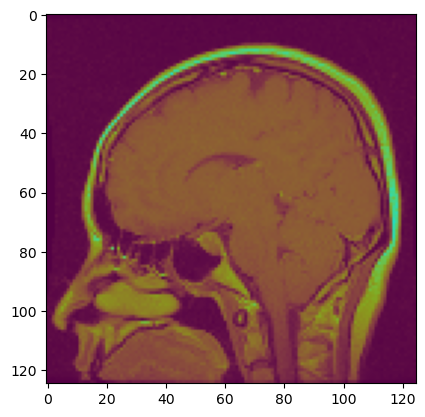

125


In [24]:
img_size = 125
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()
print(len(new_array))

In [25]:
training_data = []

def createtraining_data():
    for category in categories:
        path = os.path.join(Directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
            
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

        
createtraining_data()

In [26]:
print(len(training_data))

2239


In [27]:
import random

random.shuffle(training_data)

In [28]:
x = []
y = []

In [29]:
from keras.utils import np_utils
for features , label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1 , img_size,img_size ,3)




y = np_utils.to_categorical(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 67)




In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (img_size,img_size,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Conv2D(32,(3,3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))

model.add(Dropout(0.2))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' ,metrics = ['accuracy'])
history = model.fit(x_train , y_train, batch_size = 64 , epochs = 15 ,verbose = 1
                   , validation_split = 0.1)
score = model.evaluate(x_test , y_test, verbose =1)



In [23]:
import os.path
model.save("Brain_tumour_classification.h5")

In [15]:
print('test accuracy :',score [1])

test accuracy : 0.73707867


In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
predictions = model.predict(x_test)

In [28]:
predictions[89]

array([0.3447662 , 0.33103442, 0.32419938], dtype=float32)